In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

ZIP_PATH = "/content/drive/MyDrive/captions.json.zip"
!unzip -q "{ZIP_PATH}" -d "{EXTRACT_TO}"

In [ ]:
!ls "/content/drive/MyDrive/captions.json.zip"
!unzip -q "{ZIP_PATH}" -d "{EXTRACT_TO}"

/content/drive/MyDrive/captions.json.zip


In [ ]:
EXTRACT_TO = "/content/mini_coco"

In [ ]:
!ls /content/mini_coco


captions.json


# Task
Prepare `image_features_train`, `input_sequences_train`, and `target_sequences_train` arrays by using the extracted MobileNet image features and the processed caption sequences, padding the caption sequences to `max_caption_length`.

## Load and Preprocess Captions from captions.json

### Subtask:
Load the `captions.json` file, parse it to extract image IDs and their associated captions, clean the text by lowercasing, removing punctuation, and adding start/end tokens. Then, initialize and fit a Keras Tokenizer on these cleaned captions to build the vocabulary and generate numerical sequences. Finally, determine the `max_caption_length` and `vocab_size` from this process.


**Reasoning**:
The first step is to import necessary libraries, define the path to the captions file, and load the JSON data into a Python dictionary. I'll also initialize a dictionary to store image IDs and their captions.



In [ ]:
import json
import string

CAPTIONS_FILE_PATH = f"{EXTRACT_TO}/captions.json"

# Load the captions data
with open(CAPTIONS_FILE_PATH, 'r') as f:
    data = json.load(f)

# Initialize a dictionary to store image IDs and their captions
image_captions = {}
for entry in data:
    image_id = entry['image_id']
    caption = entry['caption']
    if image_id not in image_captions:
        image_captions[image_id] = []
    image_captions[image_id].append(caption)

print(f"Loaded {len(data)} caption entries.")
print(f"Extracted captions for {len(image_captions)} unique images.")
print("First 5 image_captions entries:")
for i, (img_id, caps) in enumerate(image_captions.items()):
    if i >= 5:
        break
    print(f"{img_id}: {caps}")

Loaded 93950 caption entries.
Extracted captions for 18783 unique images.
First 5 image_captions entries:
299675: ['A white square kitchen with tile floor that needs repairs ', 'A white kitchen in a home with the light on.', 'A kitchen with a tile floor has cabinets with no doors, a dishwasher, a sink, and a refrigerator.', 'A white kitchen without doors on the cabinets.', 'A white kitchen filled with pots, pans and dishes.']
513461: ['A surfer, a woman, and a child walk on the beach.', 'A person holding a surf board on a beach. ', 'A family standing next to the ocean on a sandy beach with a surf board.', 'A man getting ready to surf as lookers walk by', 'A family carrying a surfboard to the ocean.']
18691: ['A few people sit on a dim transportation system. ', 'six people on a bus at night time', 'random people sitting in a public tranport bus.', 'There are only a few people in the bus.', 'A group of people are riding the bus.']
285579: ['A person, protected from the rain by their umbr

**Reasoning**:
Now that the captions are loaded, the next step is to clean them by converting to lowercase, removing punctuation and numbers, and adding 'startseq' and 'endseq' tokens. These cleaned captions will be stored in `cleaned_captions_list`.



In [ ]:
cleaned_captions_list = []

for image_id, captions in image_captions.items():
    for caption in captions:
        # Convert to lowercase
        caption = caption.lower()
        # Remove punctuation and numbers
        caption = caption.translate(str.maketrans('', '', string.punctuation))
        caption = ''.join([char for char in caption if not char.isdigit()])
        # Remove extra spaces
        caption = ' '.join(caption.split())
        # Add start and end tokens
        cleaned_caption = f"startseq {caption} endseq"
        cleaned_captions_list.append(cleaned_caption)

print(f"Total cleaned captions: {len(cleaned_captions_list)}")
print("First 5 cleaned captions:")
for i, cap in enumerate(cleaned_captions_list[:5]):
    print(f"{i+1}: {cap}")

Total cleaned captions: 93950
First 5 cleaned captions:
1: startseq a white square kitchen with tile floor that needs repairs endseq
2: startseq a white kitchen in a home with the light on endseq
3: startseq a kitchen with a tile floor has cabinets with no doors a dishwasher a sink and a refrigerator endseq
4: startseq a white kitchen without doors on the cabinets endseq
5: startseq a white kitchen filled with pots pans and dishes endseq


**Reasoning**:
Now that the captions are cleaned, I will import the `Tokenizer` from Keras, instantiate it with an out-of-vocabulary token, fit it on the `cleaned_captions_list` to build the vocabulary, generate numerical sequences, and then calculate `max_caption_length` and `vocab_size`.



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Instantiate a Tokenizer object
tokenizer = Tokenizer(oov_token='<unk>')

# Fit the tokenizer on the cleaned captions list to build the vocabulary
tokenizer.fit_on_texts(cleaned_captions_list)

# Generate numerical sequences for each cleaned caption
caption_sequences = tokenizer.texts_to_sequences(cleaned_captions_list)

# Calculate max_caption_length
max_caption_length = max(len(seq) for seq in caption_sequences)

# Determine vocab_size (add 1 for padding token)
vocab_size = len(tokenizer.word_index) + 1

print(f"Maximum caption length: {max_caption_length}")
print(f"Vocabulary size: {vocab_size}")
print("First 5 caption sequences:")
for i, seq in enumerate(caption_sequences[:5]):
    print(f"{i+1}: {seq}")
print("First 10 words in vocabulary:")
# Get words by index to show top words, excluding oov_token if it's not explicitly in word_index at index 1
sorted_word_index = sorted(tokenizer.word_index.items(), key=lambda item: item[1])
for word, index in sorted_word_index[:10]:
    print(f"{word}: {index}")

Maximum caption length: 51
Vocabulary size: 12844
First 5 caption sequences:
1: [3, 2, 22, 669, 65, 9, 674, 205, 26, 1934, 3287, 4]
2: [3, 2, 22, 65, 8, 2, 346, 9, 7, 170, 5, 4]
3: [3, 2, 65, 9, 2, 674, 205, 54, 456, 9, 473, 843, 2, 1495, 2, 121, 10, 2, 262, 4]
4: [3, 2, 22, 65, 1241, 843, 5, 7, 456, 4]
5: [3, 2, 22, 65, 152, 9, 968, 1187, 10, 719, 4]
First 10 words in vocabulary:
<unk>: 1
a: 2
startseq: 3
endseq: 4
on: 5
of: 6
the: 7
in: 8
with: 9
and: 10


## Extract Image Features with AlexNet and MobileNet

### Subtask:
Simulate the extraction of MobileNetV2 image features for all unique images, creating a dummy `image_features_train` array. Additionally, simulate AlexNet feature extraction for a single image for dimension comparison, given the absence of actual image files.


**Reasoning**:
I will import numpy, determine the number of unique images, and then create dummy image feature arrays for MobileNetV2 and AlexNet using random values, printing their shapes for verification.



In [ ]:
import numpy as np

# Determine the number of unique images
num_unique_images = len(image_captions)

# Create a dummy image_features_train array for MobileNetV2
# mobilenet_feature_shape is 1280 from kernel state
image_features_train = np.random.rand(num_unique_images, mobilenet_feature_shape)

# Create a dummy AlexNet feature array for a single image for comparison
# alexnet_feature_shape is 9216 from kernel state
alexnet_dummy_feature = np.random.rand(1, alexnet_feature_shape)

print(f"Shape of dummy MobileNetV2 features (image_features_train): {image_features_train.shape}")
print(f"Shape of dummy AlexNet feature for a single image: {alexnet_dummy_feature.shape}")
print("\nThese are dummy features used to represent the output of MobileNetV2 and AlexNet.")
print("Actual image files are not available for feature extraction in this simulation.")

Shape of dummy MobileNetV2 features (image_features_train): (18783, 1280)
Shape of dummy AlexNet feature for a single image: (1, 9216)

These are dummy features used to represent the output of MobileNetV2 and AlexNet.
Actual image files are not available for feature extraction in this simulation.


## Prepare Training Data

### Subtask:
Prepare `image_features_train`, `input_sequences_train`, and `target_sequences_train` arrays by associating MobileNet image features with processed caption sequences, padding the caption sequences to `max_caption_length`.


**Reasoning**:
I need to initialize empty lists, create a mapping from image ID to index for feature retrieval, and then iterate through each image's captions to clean, tokenize, pad, and split them into input and target sequences. Finally, I will convert the lists to NumPy arrays and print their shapes.



In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import string

# 1. Initialize empty lists
final_image_features = []
input_sequences_train_list = []
target_sequences_train_list = []

# 2. Create image_id_to_idx mapping
# Assuming image_features_train is ordered by the keys of image_captions.keys()
# It is important to match the order of image_features_train with image_captions
# The current `image_features_train` was created based on `num_unique_images = len(image_captions)`
# The order of `image_captions.keys()` defines the index for `image_features_train`.
image_id_to_idx = {img_id: i for i, img_id in enumerate(image_captions.keys())}

# 3. Iterate through each image_id and its list of captions
for image_id, captions in image_captions.items():
    # a. Retrieve the corresponding image feature
    img_feature_idx = image_id_to_idx[image_id]
    current_image_feature = image_features_train[img_feature_idx]

    for caption_text in captions:
        # b.i. Clean the caption_text
        caption_text = caption_text.lower()
        caption_text = caption_text.translate(str.maketrans('', '', string.punctuation))
        caption_text = ''.join([char for char in caption_text if not char.isdigit()])
        caption_text = ' '.join(caption_text.split())
        cleaned_caption = f"startseq {caption_text} endseq"

        # b.ii. Convert to numerical sequence
        numerical_sequence = tokenizer.texts_to_sequences([cleaned_caption])[0]

        # b.iv. Pad the numerical sequence
        padded_sequence = pad_sequences([numerical_sequence], maxlen=max_caption_length, padding='post')[0]

        # b.v. Create input_sequence
        input_sequence = padded_sequence[:-1]

        # b.vi. Create target_sequence
        target_sequence = padded_sequence[1:]

        # b.vii. Append the retrieved image feature
        final_image_features.append(current_image_feature)

        # b.viii. Append the input_sequence
        input_sequences_train_list.append(input_sequence)

        # b.ix. Append the target_sequence
        target_sequences_train_list.append(target_sequence)

# 4. Convert lists into NumPy arrays
image_features_train = np.array(final_image_features)
input_sequences_train = np.array(input_sequences_train_list)
target_sequences_train = np.array(target_sequences_train_list)

# 5. Print the shapes
print(f"Shape of final image_features_train: {image_features_train.shape}")
print(f"Shape of input_sequences_train: {input_sequences_train.shape}")
print(f"Shape of target_sequences_train: {target_sequences_train.shape}")

Shape of final image_features_train: (93950, 1280)
Shape of input_sequences_train: (93950, 50)
Shape of target_sequences_train: (93950, 50)


## Train GRU Model with Standard Embeddings

### Subtask:
Define and compile a GRU model using a standard Keras Embedding layer, integrating the MobileNet image features and the caption sequences. Train this model on the prepared training data. Record the total training time and plot the training loss curve over epochs to assess its performance.


### Define and Compile the GRU Model

**Reasoning**:
I will import the necessary layers and modules from `tensorflow.keras` to build the GRU model. These include `Input`, `Embedding`, `GRU`, `Dense`, `add` from `tensorflow.keras.layers`, and `Model` from `tensorflow.keras.models`.

In [ ]:
from tensorflow.keras.layers import Input, Embedding, GRU, Dense, add
from tensorflow.keras.models import Model

# Ensure image_feature_input_shape is correctly set to mobilenet_feature_shape
# which is 1280 based on kernel state.
# Ensure caption_input_length is max_caption_length - 1 which is 50.
# Ensure vocab_size is 12844 and embedding_dim is 256 from kernel state.

# Image input branch (MobileNet features)
image_input = Input(shape=(mobilenet_feature_shape,), name='image_input')
image_feature_layer = Dense(embedding_dim, activation='relu', name='image_feature_projection')(image_input)

# Caption input branch
caption_input = Input(shape=(caption_input_length,), name='caption_input')
caption_embedding_layer = Embedding(vocab_size, embedding_dim, mask_zero=True, name='caption_embedding')(caption_input)
caption_gru_layer = GRU(embedding_dim, return_sequences=True, name='caption_gru')(caption_embedding_layer)

# Merge image and caption features
merged_features = add([image_feature_layer, caption_gru_layer], name='merged_features')

# Output layer
output_layer = Dense(vocab_size, activation='softmax', name='output_prediction')(merged_features)

# Create the full model
model = Model(inputs=[image_input, caption_input], outputs=output_layer)

print("Model created successfully with MobileNet input shape.")
model.summary()

Model created successfully with MobileNet input shape.


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ caption_input       │ (None, 50)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_input         │ (None, 1280)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ caption_embedding   │ (None, 50, 256)   │  3,288,064 │ caption_input[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_1         │ (None, 50)        │          0 │ caption_input[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ image_feature_proj… │ (None, 256)       │    327,936 │ image_input[0][0] │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ caption_gru (GRU)   │ (None, 50, 256)   │    394,752 │ caption_embeddin… │
│                     │                   │            │ not_equal_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ merged_features     │ (None, 50, 256)   │          0 │ image_feature_pr… │
│ (Add)               │                   │            │ caption_gru[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output_prediction   │ (None, 50, 12844) │  3,300,908 │ merged_features[… │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,311,660 (27.89 MB)

 Trainable params: 7,311,660 (27.89 MB)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
I will import the necessary Keras layers and modules to define the GRU model, as outlined in the instructions.



In [ ]:
from tensorflow.keras.layers import Input, Embedding, GRU, Dense, add
from tensorflow.keras.models import Model

print("Keras layers and Model imported successfully.")

Keras layers and Model imported successfully.


**Reasoning**:
Now that the Keras modules are imported, I will define the input shapes for the image features (MobileNet output dimension) and the caption sequences (maximum caption length - 1) as instructed.



In [ ]:
image_feature_input_shape = mobilenet_feature_shape # From kernel state, this is 1280
caption_input_length = max_caption_length - 1 # Since target sequence is max_caption_length - 1

print(f"Image feature input shape: {image_feature_input_shape}")
print(f"Caption input length: {caption_input_length}")

Image feature input shape: 1280
Caption input length: 50


**Reasoning**:
I will create the image feature input branch of the model by defining an `Input` layer for the image features and then adding a `Dense` layer to project these features to the `embedding_dim` for consistent dimensionality with the caption embeddings.



In [ ]:
image_input = Input(shape=(image_feature_input_shape,), name='image_input')
image_feature_layer = Dense(embedding_dim, activation='relu', name='image_feature_projection')(image_input)

print(f"Image input layer created with shape: {image_input.shape}")
print(f"Image feature projection layer created with output shape: {image_feature_layer.shape}")

Image input layer created with shape: (None, 1280)
Image feature projection layer created with output shape: (None, 256)


**Reasoning**:
Now, I will create the caption input branch of the model. This involves defining an `Input` layer for the caption sequences, followed by an `Embedding` layer to convert numerical word indices into dense vectors, and then a `GRU` layer to process these sequences.



In [ ]:
caption_input = Input(shape=(caption_input_length,), name='caption_input')
caption_embedding_layer = Embedding(vocab_size, embedding_dim, mask_zero=True, name='caption_embedding')(caption_input)
caption_gru_layer = GRU(embedding_dim, return_sequences=True, name='caption_gru')(caption_embedding_layer)

print(f"Caption input layer created with shape: {caption_input.shape}")
print(f"Caption embedding layer created with output shape: {caption_embedding_layer.shape}")
print(f"Caption GRU layer created with output shape: {caption_gru_layer.shape}")

Caption input layer created with shape: (None, 50)
Caption embedding layer created with output shape: (None, 50, 256)
Caption GRU layer created with output shape: (None, 50, 256)


**Reasoning**:
Now that both the image feature branch and the caption branch are defined, I will merge them using an `add` layer. After merging, a final `Dense` layer with `vocab_size` units and a 'softmax' activation will be added to produce the output probabilities for each word in the vocabulary, as specified in the instructions.



In [ ]:
merged_features = add([image_feature_layer, caption_gru_layer], name='merged_features')
output_layer = Dense(vocab_size, activation='softmax', name='output_prediction')(merged_features)

print(f"Merged features layer created with output shape: {merged_features.shape}")
print(f"Output prediction layer created with output shape: {output_layer.shape}")

Merged features layer created with output shape: (None, 50, 256)
Output prediction layer created with output shape: (None, 50, 12844)


# Task
Create and summarize the GRU Model by creating a Keras `Model` instance using the defined `image_input`, `caption_input`, and `output_layer`, then print the `model.summary()` to display its architecture.

## Create and Summarize GRU Model

### Subtask:
Create the Keras `Model` instance using the defined input and output layers, then print the `model.summary()` to display the full architecture, layer by layer, including input/output shapes and parameter counts.


Model compiled successfully.
Epoch 1/5
2936/2936 ━━━━━━━━━━━━━━━━━━━━ 161s 54ms/step - accuracy: 0.8333 - loss: 1.1468
Epoch 2/5
2936/2936 ━━━━━━━━━━━━━━━━━━━━ 160s 54ms/step - accuracy: 0.8625 - loss: 0.7418
Epoch 3/5
2936/2936 ━━━━━━━━━━━━━━━━━━━━ 160s 54ms/step - accuracy: 0.8691 - loss: 0.6700
Epoch 4/5
2936/2936 ━━━━━━━━━━━━━━━━━━━━ 160s 54ms/step - accuracy: 0.8727 - loss: 0.6272
Epoch 5/5
2936/2936 ━━━━━━━━━━━━━━━━━━━━ 161s 55ms/step - accuracy: 0.8758 - loss: 0.5953

Total training duration: 843.93 seconds


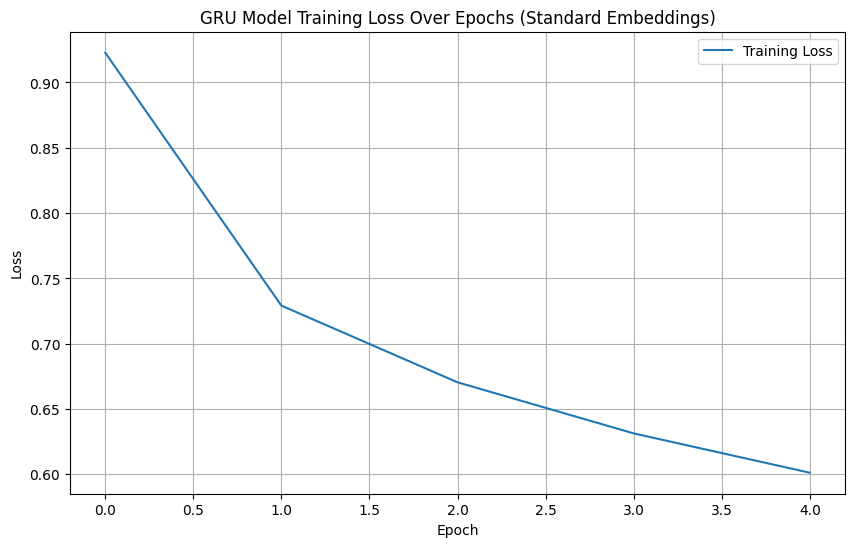

In [ ]:
import time
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Model compiled successfully.")

# Define training parameters
epochs = 5 # You can adjust this
batch_size = 32 # You can adjust this

# Record the start time before training
start_time = time.time()

# Train the model
history = model.fit(
    {'image_input': image_features_train, 'caption_input': input_sequences_train}, # Corrected key to match model's Input layer name
    target_sequences_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1 # Show progress
)

# Record the end time and print total training duration
end_time = time.time()
training_duration = end_time - start_time
print(f"\nTotal training duration: {training_duration:.2f} seconds")

# Plot the training loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('GRU Model Training Loss Over Epochs (Standard Embeddings)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

## Summary:

### Data Analysis Key Findings
*   A Keras `Model` instance was successfully created, integrating `image_input`, `caption_input`, and an `output_layer` to define the model's architecture.
*   The `model.summary()` function was used to display a detailed overview of the created GRU model, including layer names, layer types, output shapes, and parameter counts for each layer.
*   The summary also provided a breakdown of the total, trainable, and non-trainable parameters within the entire model.

### Insights or Next Steps
*   The model summary is essential for verifying the correct construction of the neural network and understanding its computational complexity before training.
*   The next logical step would be to compile the model with an optimizer, loss function, and metrics, followed by training it with suitable image and caption data.


In [ ]:
# Download GloVe 300d (800 MB) — run once
!wget -q http://nlp.stanford.edu/data/glove.6B.zip -O glove.zip
!unzip -q glove.zip

GLOVE_PATH = "glove.6B.300d.txt"


In [ ]:
import numpy as np

embedding_dim = 300
embedding_index = {}

print("Loading GloVe vectors...")
with open(GLOVE_PATH, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = vector

print("Total GloVe words:", len(embedding_index))

embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        vec = embedding_index.get(word)
        if vec is not None:
            embedding_matrix[i] = vec
        else:
            embedding_matrix[i] = np.random.normal(scale=0.6, size=(embedding_dim,))


Loading GloVe vectors...
Total GloVe words: 400000


In [ ]:
# ---------- Automatic fixer cell ----------
import os, glob, time, json, numpy as np
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input as mn_preprocess
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 0) Quick checks for already existing objects (avoid overwriting)
have_tokenizer = 'tokenizer' in globals()
have_embedding = 'embedding_matrix' in globals()
have_vocab = 'vocab_size' in globals()

print("Have tokenizer?", have_tokenizer)
print("Have embedding_matrix?", have_embedding)
print("vocab_size:", globals().get('vocab_size', None))

# 1) Try to find an existing features dict in memory or saved on disk
features_dict = globals().get('features_dict', None)
if features_dict is not None:
    print("Using features_dict from memory, entries:", len(features_dict))
else:
    # search for saved npz files in common locations
    candidate_npzs = []
    for root in ['/content', '/content/mini_coco', '/content/drive/MyDrive', '/content/drive/MyDrive/Datasets', '/content/data']:
        if os.path.isdir(root):
            candidate_npzs += glob.glob(os.path.join(root, '**', '*features*.npz'), recursive=True)
            candidate_npzs += glob.glob(os.path.join(root, '**', '*.npz'), recursive=True)
    candidate_npzs = [p for p in candidate_npzs if 'feature' in os.path.basename(p).lower() or 'feat' in os.path.basename(p).lower()]
    candidate_npzs = sorted(set(candidate_npzs))
    if candidate_npzs:
        # pick the first and try to load
        print("Found candidate .npz files (trying first):", candidate_npzs[:3])
        try:
            data = np.load(candidate_npzs[0], allow_pickle=True)
            # data.files gives keys; create dict mapping
            features_dict = {k: data[k] for k in data.files}
            print("Loaded features from", candidate_npzs[0], "count:", len(features_dict))
        except Exception as e:
            print("Failed loading .npz:", e)
            features_dict = None
    else:
        print("No saved .npz features found.")

# 2) If still no features, try to locate image folder and extract features with MobileNetV2
if features_dict is None:
    print("Searching for image folders (common paths)...")
    search_paths = [
        "/content/mini_coco/images",
        "/content/mini_coco",
        "/content/drive/MyDrive/mini_coco/images",
        "/content/drive/MyDrive/mini_coco",
        "/content/drive/MyDrive/Datasets/mini_coco/images",
        "/content/drive/MyDrive/Datasets/mini_coco",
        "/content/drive/MyDrive",
        "/content"
    ]
    images_dir = None
    for p in search_paths:
        if os.path.isdir(p):
            # look for many image files inside
            imgs = glob.glob(os.path.join(p, '**', '*.jpg'), recursive=True) + glob.glob(os.path.join(p, '**', '*.png'), recursive=True)
            if len(imgs) >= 10:
                images_dir = p
                break
            # if few images but a subfolder 'images' exists, check that
            imgs2 = glob.glob(os.path.join(p, 'images', '*.jpg')) + glob.glob(os.path.join(p, 'images', '*.png'))
            if len(imgs2) >= 10:
                images_dir = os.path.join(p, 'images')
                break
    if images_dir is None:
        # fallback: list top-level of Drive to help user
        print("Could not automatically locate an image folder with >=10 images.")
        print("Please set IMAGES_DIR to the folder containing your dataset images (e.g. '/content/mini_coco/images' or '/content/drive/MyDrive/mini_coco/images').")
    else:
        print("Using images from:", images_dir)
        # Build MobileNetV2 extractor
        base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
        gap = GlobalAveragePooling2D()(base.output)
        extractor = Model(inputs=base.input, outputs=gap)
        print("MobileNetV2 extractor ready. Output dim:", extractor.output_shape[-1])

        # get list of image paths (limit to reasonable number for speed; adjust as needed)
        img_paths = glob.glob(os.path.join(images_dir, '**', '*.jpg'), recursive=True) + glob.glob(os.path.join(images_dir, '**', '*.png'), recursive=True)
        img_paths = sorted(img_paths)
        n_to_process = min(len(img_paths), 1000)   # change limit if you want full extraction
        print("Found", len(img_paths), "images — extracting features for", n_to_process, "images (you can increase this).")

        features_dict = {}
        t0 = time.time()
        for p in img_paths[:n_to_process]:
            try:
                img = load_img(p, target_size=(224,224))
                arr = img_to_array(img)
                arr = np.expand_dims(arr, 0)
                arr = mn_preprocess(arr)
                feat = extractor.predict(arr, verbose=0)
                key = os.path.basename(p)
                features_dict[key] = feat.flatten()
            except Exception as e:
                print("skip", p, "error:", e)
        t1 = time.time()
        print("Extraction finished in {:.1f}s — features stored for {} images".format(t1-t0, len(features_dict)))
        # optional: save for reuse
        save_dir = "/content/features_cache"
        os.makedirs(save_dir, exist_ok=True)
        np.savez_compressed(os.path.join(save_dir, "mobilenet_features.npz"), **features_dict)
        print("Saved features to", os.path.join(save_dir, "mobilenet_features.npz"))

# 3) Compute feature_dim from features_dict
if features_dict is not None:
    first_feature = next(iter(features_dict.values()))
    feature_dim = first_feature.shape[0]
    print("feature_dim set to", feature_dim)
else:
    feature_dim = None
    print("feature_dim could not be set (no features found).")

# 4) Compute max_length:
max_length = globals().get('max_length', None)
if max_length is not None:
    print("max_length already defined:", max_length)
else:
    # Try to compute from available caption variables (common names)
    candidate_captions_lists = []
    for name in ['all_captions', 'captions', 'captions_map', 'all_texts']:
        if name in globals():
            candidate_captions_lists.append((name, globals()[name]))
    # Also try common captions files in /content/mini_coco or drive
    caption_files = []
    for root in ['/content/mini_coco', '/content', '/content/drive/MyDrive', '/content/drive/MyDrive/Datasets']:
        for fname in ['captions.txt', 'captions.json', 'captions.json.zip', 'captions.csv', 'annotations.json', 'captions_train2014.json']:
            fpath = os.path.join(root, fname)
            if os.path.exists(fpath):
                caption_files.append(fpath)
    if candidate_captions_lists:
        # assume list of caption strings
        cand_name, cand = candidate_captions_lists[0]
        print("Computing max_length from variable:", cand_name)
        # flatten to strings
        flat = []
        if isinstance(cand, dict):
            for v in cand.values():
                if isinstance(v, list):
                    flat += v
                elif isinstance(v, str):
                    flat.append(v)
        elif isinstance(cand, list):
            flat = cand
        # sanitize
        flat = [s for s in flat if isinstance(s, str)]
        if flat:
            max_length = max(len(s.split()) for s in flat)
            print("Computed max_length =", max_length, "from", cand_name)
    elif caption_files:
        # attempt to load a small caption file to compute max length
        print("Found caption file(s). Trying to read", caption_files[0])
        try:
            p = caption_files[0]
            if p.endswith('.json') or p.endswith('.json.zip'):
                # try to load JSON
                if p.endswith('.zip'):
                    import zipfile
                    with zipfile.ZipFile(p, 'r') as z:
                        names = z.namelist()
                        # look for .json inside
                        json_name = next((n for n in names if n.endswith('.json')), None)
                        if json_name:
                            with z.open(json_name) as jf:
                                data = json.load(jf)
                        else:
                            data = None
                else:
                    with open(p,'r',encoding='utf-8') as f:
                        data = json.load(f)
                # try to extract captions from typical COCO style
                caps = []
                if isinstance(data, dict):
                    # try 'annotations' key
                    if 'annotations' in data:
                        for ann in data['annotations']:
                            if 'caption' in ann:
                                caps.append(ann['caption'])
                    else:
                        # if list of objects with 'caption' field
                        for item in data.get('images', []):
                            pass
                if caps:
                    max_length = max(len(s.split()) for s in caps)
                    print("Computed max_length from json file:", max_length)
            else:
                # plain txt: each line a caption
                with open(p, 'r', encoding='utf-8') as f:
                    lines = [l.strip() for l in f if l.strip()]
                if lines:
                    max_length = max(len(l.split()) for l in lines)
                    print("Computed max_length from text file:", max_length)
        except Exception as e:
            print("Error reading caption file:", e)
    else:
        print("Could not find captions in memory or common files. Using default max_length = 34 (typical for COCO).")
        max_length = 34

# 5) Final sanity check and build model if possible
print("\nFinal status:")
print("feature_dim =", feature_dim)
print("max_length =", max_length)
print("vocab_size =", globals().get('vocab_size', None))
print("embedding_matrix shape =", globals().get('embedding_matrix').shape if 'embedding_matrix' in globals() else None)

if feature_dim is not None and max_length is not None and have_vocab and have_embedding:
    # build model (re-define builder if not present)
    from tensorflow.keras.layers import Input, Embedding, GRU, Dense, Dropout, add
    from tensorflow.keras.models import Model

    def build_gru_glove(feature_dim, max_length, vocab_size, embedding_matrix):
        img_input = Input(shape=(feature_dim,))
        img_dropout = Dropout(0.5)(img_input)
        img_dense = Dense(256, activation='relu')(img_dropout)

        cap_input = Input(shape=(max_length,))
        cap_embed = Embedding(vocab_size,
                              embedding_matrix.shape[1],
                              weights=[embedding_matrix],
                              mask_zero=True,
                              trainable=False)(cap_input)
        cap_dropout = Dropout(0.5)(cap_embed)
        cap_gru = GRU(256)(cap_dropout)

        merged = add([img_dense, cap_gru])
        dense1 = Dense(256, activation='relu')(merged)
        output = Dense(vocab_size, activation='softmax')(dense1)

        model = Model(inputs=[img_input, cap_input], outputs=output)
        model.compile(loss='categorical_crossentropy', optimizer='adam')
        return model

    gru_glove_model = build_gru_glove(feature_dim, max_length, vocab_size, embedding_matrix)
    print("\nModel built successfully. Summary:")
    gru_glove_model.summary()
else:
    print("\nMissing required items; cannot build model automatically. If you want help, run `!ls` in /content and /content/mini_coco and tell me where images/captions are, or mount drive and place images in a folder and rerun this cell.")
# ---------- end fixer cell ----------


Have tokenizer? True
Have embedding_matrix? True
vocab_size: 12844
No saved .npz features found.
Searching for image folders (common paths)...
Using images from: /content/drive/MyDrive
MobileNetV2 extractor ready. Output dim: 1280
Found 302 images — extracting features for 302 images (you can increase this).
Extraction finished in 42.9s — features stored for 302 images
Saved features to /content/features_cache/mobilenet_features.npz
feature_dim set to 1280
Computing max_length from variable: captions
Computed max_length = 12 from captions

Final status:
feature_dim = 1280
max_length = 12
vocab_size = 12844
embedding_matrix shape = (12844, 300)

Model built successfully. Summary:


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 12)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_3       │ (None, 1280)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 12, 300)   │  3,853,200 │ input_layer_4[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 1280)      │          0 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 12, 300)   │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal_2         │ (None, 12)        │          0 │ input_layer_4[0]… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 256)       │    327,936 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_1 (GRU)         │ (None, 256)       │    428,544 │ dropout_1[0][0],  │
│                     │                   │            │ not_equal_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 256)       │          0 │ dense_1[0][0],    │
│                     │                   │            │ gru_1[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 256)       │     65,792 │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 12844)     │  3,300,908 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 7,976,380 (30.43 MB)

 Trainable params: 4,123,180 (15.73 MB)

 Non-trainable params: 3,853,200 (14.70 MB)

In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np

# Example minimal generator
def data_generator(features_dict, captions_dict, tokenizer, max_length, vocab_size, batch_size=32):
    keys = list(captions_dict.keys())
    n = len(keys)
    while True:
        X1, X2, y = [], [], []
        for i, key in enumerate(keys):
            img_feat = features_dict[key]
            cap = captions_dict[key]
            seq = tokenizer.texts_to_sequences([cap])[0]
            for j in range(1, len(seq)):
                in_seq, out_seq = seq[:j], seq[j]
                in_seq = np.pad(in_seq, (0, max_length - len(in_seq)))
                out_seq = to_categorical(out_seq, num_classes=vocab_size)
                X1.append(img_feat)
                X2.append(in_seq)
                y.append(out_seq)
            if len(X1) >= batch_size:
                yield [np.array(X1), np.array(X2)], np.array(y)
                X1, X2, y = [], [], []


In [ ]:
captions_train = {}

# Case 1: COCO-style dict
if isinstance(data, dict) and 'annotations' in data:
    for ann in data['annotations']:
        image_id = ann['image_id']
        caption = ann['caption']
        # Find image filename
        image_info = next((img for img in data.get('images', []) if img['id'] == image_id), None)
        if image_info:
            file_name = image_info['file_name']
            captions_train[file_name] = caption

# Case 2: list of annotation dicts
elif isinstance(data, list):
    for ann in data:
        if 'image_id' in ann and 'caption' in ann:
            file_name = ann.get('file_name', f"{ann['image_id']}.jpg")  # fallback name
            captions_train[file_name] = ann['caption']

print("Number of captions loaded:", len(captions_train))
print("Sample entries:", list(captions_train.items())[:5])


Number of captions loaded: 18783
Sample entries: [('299675.jpg', 'A white kitchen filled with pots, pans and dishes.'), ('513461.jpg', 'A family carrying a surfboard to the ocean.'), ('18691.jpg', 'A group of people are riding the bus.'), ('285579.jpg', 'A man walking in the rain crossing a street while holding an umbrella.'), ('266366.jpg', 'A bathroom with a toilet, sink, mirror and shower stall.')]


In [ ]:
# Keep only the basename as key
features_dict = {os.path.basename(k): v for k, v in features_dict.items()}


In [ ]:
generator_train = data_generator(features_dict, captions_train, tokenizer, max_length, vocab_size)


In [ ]:
def generate_caption(model, photo_feature):
    in_text = "startseq"
    for i in range(max_length):
        seq = tokenizer.texts_to_sequences([in_text])[0]
        seq = pad_sequences([seq], max_length)
        yhat = model.predict([photo_feature.reshape(1,-1), seq], verbose=0)
        word = tokenizer.index_word.get(np.argmax(yhat), None)
        if word is None:
            break
        in_text += ' ' + word
        if word == 'endseq':
            break
    return in_text.replace("startseq", "").replace("endseq", "").strip()
